# Descripción general

La finalidad del proyecto es desarrollar un modelo que pueda analizar el comportamiento de los clientes y prediga si tiene planes de dejar el banco Beta Bank pronto.

Se realizaron pruebas de Machine Learning en los modelos de clasificación: árbol de decisión, bosque aleatorio y regresión lineal, midiendo las métricas AUC-ROC y F1-score.

## Información general

### Inicialización

In [192]:
#instalamos la librería imbalanced-learn para equilibrar las clases con SMOTE
pip install imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [193]:
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [194]:
try:
    df=pd.read_csv('Churn.csv')
except:
    df=pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


El dataset 'df' contiene información acerca del comportamiento bancario del cliente. La información dad es la siguiente:
- RowNumber: índice de cadena de datos
- CustomerId: identificador de cliente único
- Surname: apellido
- CreditScore: valor de crédito
- Geography: país de residencia
- Gender: sexo
- Age: edad
- Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- Balance: saldo de la cuenta
- NumOfProducts: número de productos bancarios utilizados por el cliente
- HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- IsActiveMember: actividad del cliente (1 - sí; 0 - no)
- EstimatedSalary: salario estimado
- Exited: El cliente se ha ido (1 - sí; 0 - no)

La columna 'exited' será la variable objetivo en los modelos de Machine Learning.

In [195]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [196]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Preprocesamiento de datos

Se realizó el preprocesamiento general que consiste en eliminar valores nulos, duplicados y columnas que no servirán para el algoritmo de Machine Learning. Posteriormente, se realizó el equilibrio de clases y se usaron los métodos de OHE y  escalamiento, además de la correspondiente segmentación de datos de entrenamiento, validación y prueba.  

### Preprocesamiento general

Convertimos los nombres de las columnas a minúsculas.

In [197]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Eliminamos los valores nulos.  

In [198]:
df=df.loc[~df['tenure'].isna()]
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


No se encontraron valores duplicados en el dataset.

In [199]:
df.duplicated().sum()

0

Eliminamos las columnas que no son importantes en los entrenamientos de Machine Learning.

In [200]:
df=df.drop(['rownumber','customerid','surname'],axis=1)
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


### OHE 

Se aplicó el método One Hot Encoding en las columnas 'geography' y 'gender' con el parámetro drop_first = True.

In [201]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


### Escalamiento

Aplicamos el escalamiento en las columnas numéricas 'creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember' y 'estimatedsalary'.

In [202]:
numeric = ['creditscore', 'age', 'tenure', 'balance','numofproducts','hascrcard','isactivemember','estimatedsalary']

scaler=StandardScaler()
scaler.fit(df_ohe[numeric])
df_ohe[numeric]=scaler.transform(df_ohe[numeric])
df_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,-0.329200,0.289040,-1.035627,-1.227780,-0.912601,0.646896,0.96934,0.020264,1,0,0,0
1,-0.443301,0.194298,-1.381103,0.116887,-0.912601,-1.545844,0.96934,0.214527,0,0,1,0
2,-1.542828,0.289040,1.037224,1.333920,2.529911,0.646896,-1.03163,0.238632,1,0,0,0
3,0.500631,0.004815,-1.381103,-1.227780,0.808655,-1.545844,-1.03163,-0.110281,0,0,0,0
4,2.066937,0.383782,-1.035627,0.785996,-0.912601,0.646896,0.96934,-0.366132,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.548293,-0.942603,-1.035627,-1.227780,0.808655,-1.545844,-1.03163,1.173038,0,0,0,0
9995,1.247479,0.004815,0.000798,-1.227780,0.808655,0.646896,-1.03163,-0.067866,0,0,0,1
9996,-1.397607,-0.374153,1.728174,-0.307305,-0.912601,0.646896,0.96934,0.026354,0,0,0,1
9997,0.604360,-0.279411,0.691748,-1.227780,-0.912601,-1.545844,0.96934,-1.008227,1,0,0,0


### Segmentación de datos

El dataset 'df' es dividido en dos datasets 'features' y 'target' donde features será el dataset que contiene las variables que guiarán al modelo para predecir si el objetivo target abandona el banco o no.

In [203]:
features=df_ohe.drop(['exited'],axis=1)
target=df_ohe['exited']

Separamos el dataset en conjuntos de entrenamiento (train), validación (valid) y de prueba (test).

In [204]:
features, features_test, target, target_test = train_test_split(features,target,test_size=0.2,random_state=54321)
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size = 0.25, random_state=54321)

## Evaluación de modelos de Machine Learning desbalanceado

Debido a que queremos predecir una variable categórica (si un cliente abandona el banco o permanece), usaremos los modelos de clasificación: árbol de decisiones, bosque aleatorio y regresión logística.

### Árbol de decisión

Se realizó una iteración para encontrar el mejor modelo variando la profundidad máxima de 1 a 20.

In [205]:
best_score=0
best_depth=0

for depth in range(1,21):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train,target_train)
    predictions_valid=model_tree.predict(features_valid)
    score=f1_score(target_valid,predictions_valid)
    if score > best_score:
        best_score = score
        best_depth = depth   
    
print('Árbol de decisión en conjunto de validación')
print("F1-score del mejor modelo en el conjunto de validación (best depth = {}): {}".format(best_depth, best_score))

Árbol de decisión en conjunto de validación
F1-score del mejor modelo en el conjunto de validación (best depth = 7): 0.6123076923076923


Se alcanzó un mejor valor de F1-score cuando el parámetro max_depth es igual a 7.

### Bosque aleatorio

Se realizó una iteración para encontrar el mejor modelo variando el número de estimadores de 1 a 50.

In [206]:
best_score = 0
best_est = 0
for est in range(1, 51): 
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model_forest.fit(features_train,target_train) 
    predicted_valid=model_forest.predict(features_valid)
    score = f1_score(target_valid,predicted_valid) 
    if score > best_score:
        best_score = score
        best_est = est

print('Bosque aleatorio en conjunto de validación')
print("F1-score del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))



Bosque aleatorio en conjunto de validación
F1-score del mejor modelo en el conjunto de validación (n_estimators = 31): 0.6


Se alcanzó un mejor valor de F1-score cuando el parámetro n_estimators es igual a 31.

### Regresión lineal

En este modelo se usó como hiperparámetro solver = 'liblinear'.

In [207]:
model_reg = LogisticRegression(random_state=12345,solver='liblinear')
model_reg.fit(features_train, target_train)
predicted_valid = model_reg.predict(features_valid)

print('Regresión lineal en conjunto de validación')
print('F1-score:',f1_score(target_valid, predicted_valid))
print()


Regresión lineal en conjunto de validación
F1-score: 0.33530571992110453



### Conclusiones

- El mejor modelo de árbol de decisiones brinda un F1-score de 0.612 con profundidad máxima = 7.
- El mejor modelo de bosque aleatorio brinda un F1-score de 0.6 con número de estimadores = 31.
- El modelo de regresión logística brinda un F1-score de 0.335. 
- Dos de los tres modelos de Machine Learning usados superan el umbral de 0.59; sin embargo, no son lo suficiente altos como para superar el umbral en los modelos de prueba.

## Evaluación de modelos de Machine Learning

Debido a que los valores de F1-score son demasiado bajos, realizamos un equilibrio en los valores objetivos solo para el conjunto de entrenamiento. Posteriormente, se volvió a usar los modelos de clasificación: árbol de decisiones, bosque aleatorio y regresión logística modificando el umbral.

### Equilibrio de clases

Se identificó que el objetivo contiene excesivos valores de 0 en comparación con 1.

In [208]:
target_train.value_counts()

0    4355
1    1099
Name: exited, dtype: int64

Se multiplicaron por 4 la cantidad de filas en las cuales el objetivo tiene valor igual a 1 y se usó el algoritmo SMOTE para completar el balanceo. Posteriormente, se mezclaron aleatoriamente las filas.

In [209]:
def up_down_sample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros.sample(frac=1, random_state=12345)] + [features_ones] * 4)
    target_upsampled = pd.concat([target_zeros.sample(frac=1, random_state=12345)] + [target_ones] * 4)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


In [210]:
features_train, target_train = up_down_sample(
    features_train, target_train)

Verificamos el equilibrio realizado.

In [211]:
target_train.value_counts()


1    4396
0    4355
Name: exited, dtype: int64

In [212]:
sm = SMOTE(random_state=12345)
features_train, target_train = sm.fit_resample(features_train, target_train)

In [213]:
target_train.value_counts()

0    4396
1    4396
Name: exited, dtype: int64

El número de valores en el objetivo está ahora equilibrado.

### Árbol de decisión

Se realizó una iteración para encontrar el mejor modelo variando la profundidad máxima de 1 a 20.

In [214]:
best_score=0
best_depth=0

for depth in range(1,21):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train,target_train)
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    #predictions_valid=model_tree.predict(features_valid)
    for threshold in np.arange(0, 0.7, 0.02):
        predicted_valid = probabilities_one_valid>threshold
        score=f1_score(target_valid,predicted_valid)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_threshold = threshold

print('Árbol de decisión en conjunto de validación')
print("F1-score del mejor modelo en el conjunto de validación: {}".format(best_score))
print("Mejor depth: {}".format(best_depth))
print("Mejor threshold: {}".format(best_threshold))

Árbol de decisión en conjunto de validación
F1-score del mejor modelo en el conjunto de validación: 0.6221079691516709
Mejor depth: 8
Mejor threshold: 0.66


Se alcanzó un mejor valor de F1-score cuando el parámetro max_depth = 8 y threshold = 0.66

### Bosque aleatorio

Se realizó una iteración para encontrar el mejor modelo variando el número de estimadores de 1 a 50.

In [215]:
best_score=0
best_depth=0
best_est=0

for est in range(1, 51): 
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model_forest.fit(features_train,target_train)
    probabilities_valid = model_forest.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    for threshold in np.arange(0, 0.7, 0.02):
        predicted_valid = probabilities_one_valid>threshold
        score=f1_score(target_valid,predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_threshold = threshold

print('Bosque aleatorio en conjunto de validación')
print("F1-score del mejor modelo en el conjunto de validación: {}".format(best_score))
print("Mejor est: {}".format(best_est))
print("Mejor threshold: {}".format(best_threshold))

Bosque aleatorio en conjunto de validación
F1-score del mejor modelo en el conjunto de validación: 0.6184738955823292
Mejor est: 49
Mejor threshold: 0.42


Se alcanzó un mejor valor de F1-score cuando el parámetro n_estimators = 49 y threshold = 0.42.

### Regresión lineal

En este modelo se usó como hiperparámetro solver = 'liblinear'.

In [216]:
model_reg = LogisticRegression(random_state=12345,solver='liblinear')
model_reg.fit(features_train, target_train)

probabilities_valid = model_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]



In [217]:
best_score = 0
best_threshold = 0

for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid>threshold
    score=f1_score(target_valid,predicted_valid)
    if score > best_score:
        best_score = score
        best_threshold = threshold
print("F1-score del mejor modelo en el conjunto de validación (threshold = {}): {}".format(best_threshold, best_score))

F1-score del mejor modelo en el conjunto de validación (threshold = 0.56): 0.5369565217391304


### Conclusiones

- El mejor modelo de árbol de decisiones brinda un F1-score de 0.6221 con profundidad máxima = 8 y threshold = 0.66.
- El mejor modelo de bosque aleatorio brinda un F1-score de 0.6184 con número de estimadores = 49 y threshold = 42.
- El modelo de regresión logística brinda un F1-score de 0.5369 con un valor de threshold = 0.56.
- El mejor modelo en los conjuntos de validación es el árbol de decisión, seguido de bosque aleatorio. 
- Dos de los tres modelos de Machine Learning usados superan el umbral de 0.59. Los modelos árbol de decisión y bosque aleatorio mejoraron ligeramente el valor de F1-score; sin embargo, el modelo bosque aleatorio tiene un tiempo de procesamiento mucho mayor.

## Comprobación en conjuntos de prueba

### Árbol de decisión

Ejecutamos el modelo de árbol de decisiones con el hiperparámetro max_depth = 17 y threshold = 0.66.

In [218]:
model_tree = DecisionTreeClassifier(random_state=12345,max_depth=8)
model_tree.fit(features_train, target_train)
probabilities_test = model_tree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test>0.66
print('Árbol de decisión en conjunto de prueba')
print('F1-score:',f1_score(target_test,predicted_test))


Árbol de decisión en conjunto de prueba
F1-score: 0.5533498759305211


Calculamos el valor AUC-ROC.

In [219]:
auc_roc=roc_auc_score(target_test,predicted_test)
print('AUC-ROC:',auc_roc)

AUC-ROC: 0.7192369621128616


Elaboramos la matriz de confusión de árbol de decisión.

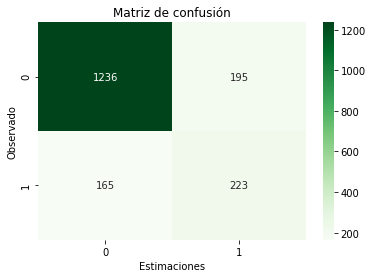

In [220]:
cnf = confusion_matrix(target_test, predicted_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de árbol de decisiones predice en un gran número de verdaderos negativos pero muy pocos verdaderos positivos, lo cual concuerda con el valor F1-score = 0.5533. Este modelo presenta un AUC-ROC de 0.7263. 

### Bosque aleatorio

Ejecutamos el modelo de bosque aleatorio con el hiperparámetros n_estimators = 19 y threehold = 0.42.

In [221]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=49) 
model_forest.fit(features_train,target_train) 
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test>0.42
print('Bosque aleatorio en conjunto de prueba')
print('F1-score:',f1_score(target_test,predicted_test))

Bosque aleatorio en conjunto de prueba
F1-score: 0.5910828025477707


Calculamos el valor AUC-ROC.

In [222]:
auc_roc=roc_auc_score(target_test,predicted_test)
print('AUC-ROC:',auc_roc)

AUC-ROC: 0.7413170805506927


Elaboramos la matriz de confusión de bosque aleatorio.

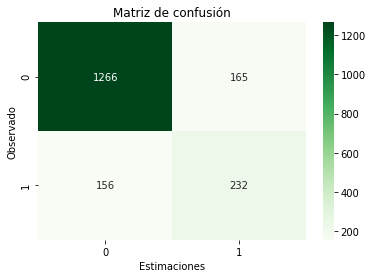

In [223]:
cnf = confusion_matrix(target_test, predicted_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de bosque aleatorio predice en un gran número de verdaderos negativos y un número muy bajo de verdaderos positivos, lo cual concuerda con el valor F1-score = 0.59108. Este modelo presenta un AUC-ROC de 0.7413.

### Regresión lineal

Ejecutamos el modelo de regresión lineal.

In [224]:
model_reg = LogisticRegression(random_state=12345,solver='liblinear')
model_reg.fit(features_train, target_train)
predicted_test = model_reg.predict(features_test)

probabilities_test = model_reg.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test>0.56

print('Regresión lineal en conjunto de prueba')
print('F1-score:',f1_score(target_test, predicted_test))
print()


Regresión lineal en conjunto de prueba
F1-score: 0.470076169749728



Calculamos el valor de AUC-ROC.

In [225]:
auc_roc=roc_auc_score(target_test,predicted_test)
print('AUC-ROC:',auc_roc)



AUC-ROC: 0.6682876223821566


Elaboramos la matriz de confusión del modelo de regresión lineal.

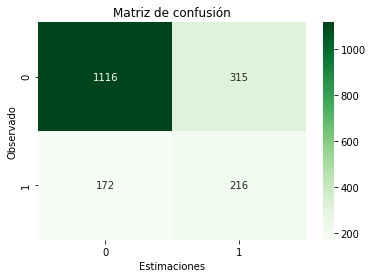

In [226]:
cnf = confusion_matrix(target_test, predicted_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de regesión lineal predice en un gran número de verdaderos negativos, pero el número de falsos positivos es superior al de verdaderos positivos, lo que concuerda con el valor F1-score = 0.47007. Este modelo presenta un AUC-ROC de 0.6682.

### Prueba de cordura

Realizamos la prueba de cordura en la que comparamos el 'target_test' con una serie en donde todos los valores son iguales a la mediana = 1.  

In [227]:
predicted_test = pd.Series(target_train.median(),index=target_test.index)
print('Mediana:')
print('F1-score:',f1_score(target_valid,predicted_valid))

Mediana:
F1-score: 0.49262536873156343


Evaluamos el AUC-SCORE:

In [228]:
auc_roc=roc_auc_score(target_test,predicted_test)
print('AUC-ROC:',auc_roc)

AUC-ROC: 0.5


A pesar de poseer un valor de F1-score = 0.492, el valor de AUC-ROC igual a 0.5 nos indica la aleatoriedad de este modelo de cordura.

## Conclusiones

- El equilibrio de clases y las modificaciones de umbral mejoraron ligeramente las predicciones.
- El valor de F1-score del modelo de regresión lineal inferior al valor del de la prueba de cordura nos indica que no es un modelo fiable.
- Los modelos de árbol de decisión y bosque aleatorio superaron ligeramente el umbral de F1-score (0.59) en los conjuntos de validación; sin embargo, solo el bosque aleatorio lo superó en el conjunto de prueba (F1-score = 0.5910).
- Todos los modelos disminuyeron en un pequeño porcentaje el valor del F1-score en los conjuntos de prueba.
- De acuerdo con los valores de AUC-SCORE, el modelo que brinda una mejor predicción es bosque aleatorio, seguido de árbol de decisión y regresión lineal.